## 02 RE Data Understanding 
#### 02-1 Importing the libraries
#### 02-2 Importing the df
#### 02-3 Checking the distribution
   ##### 02-3-1 Creating histogram
   ##### 02-3-2 Conducting P-test by a=0,05
#### 02-5 Conducting z-score calculation and finding outliers 
#### 02-6 Checking outliers by a boxplot
#### 02-7 Checking outliers by boxplot


### 01-1 Importing libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

### 01-2 Importing file

In [2]:
path=r'C:\Users\user\11-2023 Real Estate Sales Connecticut'

In [3]:
df_re=pd.read_csv(os.path.join(path,'Data','Prepared Data','realestate_clean.csv'), index_col=0)

#### Column visualization 

In [4]:
df_re

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale
0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Non Residental,2021,9
1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,2020,10
2,200212,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,2021,3
3,200243,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,2021,4
4,200377,2020,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,2021,7
...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,2020,6
997209,190284,2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,2019,11
997210,190129,2019,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,2020,4
997211,190504,2019,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,2020,6


### 01-4 Creating subset for Distribution analysis

####  Null visualization

In [5]:
count=(df_re==0).sum()

In [6]:
print(count)

Serial Number          0
List Year              0
Town                   0
Address                0
Assessed Value      6897
Sale Amount         1783
Sales Ratio         8423
Property Type          0
Residential Type       0
Year of Sale           0
Month of Sale          0
dtype: int64


#### Creating subset without 0 values to analyse the price distribution

In [7]:
df_re = df_re[df_re['Sale Amount'] != 0]

In [8]:
df_re

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale
0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Non Residental,2021,9
1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,2020,10
2,200212,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,2021,3
3,200243,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,2021,4
4,200377,2020,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,2021,7
...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,2020,6
997209,190284,2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,2019,11
997210,190129,2019,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,2020,4
997211,190504,2019,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,2020,6


#### counting other 0 values

In [9]:
count=(df_re==0).sum()

In [10]:
print(count)

Serial Number          0
List Year              0
Town                   0
Address                0
Assessed Value      6637
Sale Amount            0
Sales Ratio         6640
Property Type          0
Residential Type       0
Year of Sale           0
Month of Sale          0
dtype: int64


### visualising the 0 values:

In [11]:
df_re[df_re['Address'].str.contains('0')]

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale
0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Non Residental,2021,9
1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,2020,10
4,200377,2020,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,2021,7
14,201295,2020,Bristol,609 CAMP ST,144340.0,249900.0,0.5775,Residential,Single Family,2021,9
23,2000230,2020,Cheshire,50 ABBEY CT,210940.0,365000.0,0.5779,Residential,Single Family,2021,3
...,...,...,...,...,...,...,...,...,...,...,...
997158,190426,2019,Westport,20 BURNHAM HILL ROAD,2396100.0,3400000.0,0.7047,Single Family,Single Family,2020,7
997174,190713,2019,New Haven,1083 WHALLEY AV,262220.0,325000.0,0.8068,Non Indicated,Non Indicated,2020,6
997180,19259,2019,Monroe,90 GREENWOOD LN,265900.0,410000.0,0.6485,Single Family,Single Family,2020,8
997199,190159,2019,Wallingford,530-A5 CENTER ST,128700.0,175000.0,0.7354,Condo,Condo,2019,12


### the Conclusion:
#### the 0 in 'Address' take part of address string and is not to delet. 
#### the 0 in Ratio is the derivate value for non sold RE
#### Therefore the df is ready to analyse 


## 02-3 Checking the distribution of Sale Amount

In [12]:
### first of all let's see the statistic to to understand ranging by distribution 
df_re.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Year of Sale,Month of Sale
count,9.953670e+05,995367.000000,9.953670e+05,9.953670e+05,9.953670e+05,995367.000000,995367.000000
mean,4.315343e+05,2010.201700,2.781387e+05,3.829385e+05,1.046550e+01,2010.952809,6.812173
std,6.550747e+06,6.235429,1.414069e+06,1.421291e+06,1.891944e+03,6.244898,3.236982
min,8.100000e+01,2001.000000,0.000000e+00,1.000000e+00,0.000000e+00,1999.000000,1.000000
25%,3.045300e+04,2004.000000,8.770000e+04,1.400000e+05,4.875500e-01,2005.000000,4.000000
50%,7.032700e+04,2010.000000,1.384600e+05,2.250000e+05,6.250857e-01,2011.000000,7.000000
75%,1.600010e+05,2016.000000,2.256500e+05,3.650000e+05,7.858000e-01,2017.000000,9.000000
max,2.000500e+09,2020.000000,1.428587e+08,2.300436e+08,1.226420e+06,2021.000000,12.000000


### 02-3-1 Checking the distribution by using histogram

Text(0.5, 1.0, 'Sale Amount Distribution\nRange (0,1000000)')

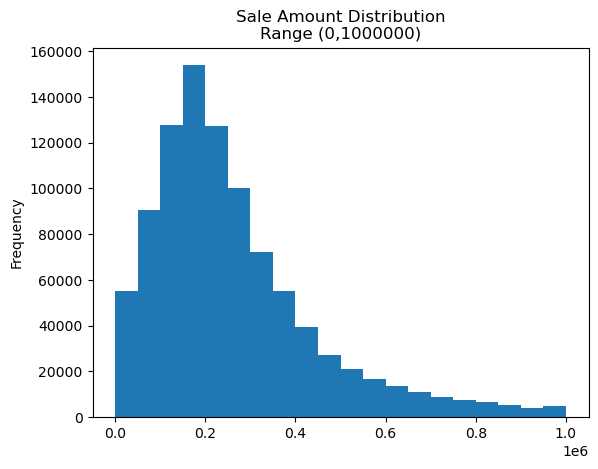

In [13]:
### Creating histogram by range 0-1mln
hist=df_re['Sale Amount'].plot.hist(bins=20,range=(0,1000000))
hist.set_title('Sale Amount Distribution\nRange (0,1000000)')

### the plot shows the left-skewed distribution.

In [14]:
### saving the plot
hist.figure.savefig(os.path.join(path,'Analytics', 'Hist_SaleAmount.png'))

Text(0.5, 1.0, 'Sale Amount Distribution\nRange (1000000,4000000)')

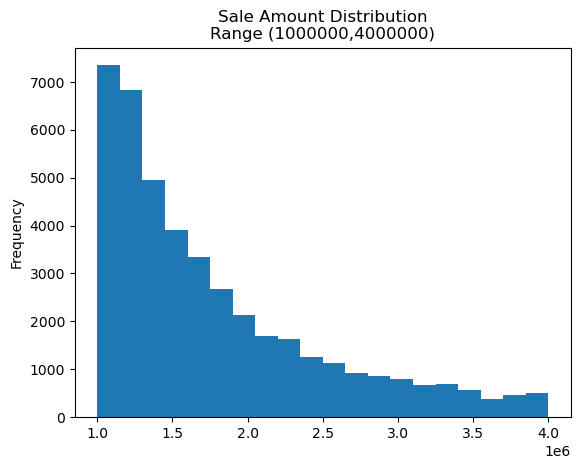

In [15]:
### Creating histogram by range 1mln-4mln
hist=df_re['Sale Amount'].plot.hist(bins=20,range=(1000000,4000000))
hist.set_title('Sale Amount Distribution\nRange (1000000,4000000)')

In [16]:
### saving the plot
hist.figure.savefig(os.path.join(path,'Analytics', 'Hist1_SaleAmountTail.png'))

Text(0.5, 1.0, 'Sale Amount Distribution\nRange (4000000,10000000)')

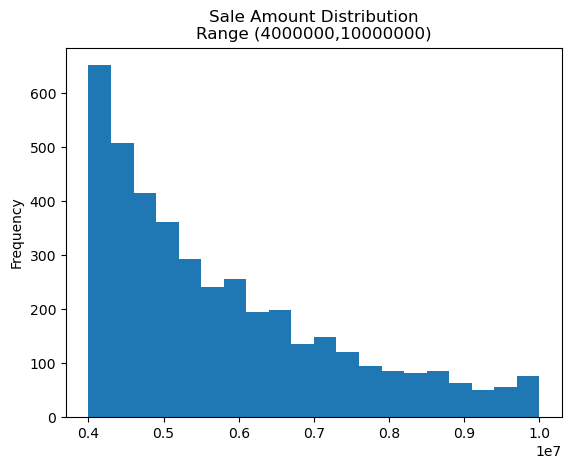

In [17]:
### Creating histogram by range 4mln-230mln
hist=df_re['Sale Amount'].plot.hist(bins=20,range=(4000000,10000000))
hist.set_title('Sale Amount Distribution\nRange (4000000,10000000)')

In [18]:
### saving the plot
hist.figure.savefig(os.path.join(path,'Analytics', 'Hist2_SaleAmountTail.png'))

### 02-3-2 Calculating P-value by α =0,05

In [19]:
from scipy import stats

In [20]:
# Normality test for 'Sale Amount' column
p_value = stats.normaltest(df_re['Sale Amount']).pvalue

In [21]:
# Print the p-value
print("P-value:", p_value)

P-value: 0.0


In [22]:
# Check for normal distribution
alpha = 0.05
if p_value < alpha:
    print("The 'Sale Amount' data is not normally distributed")
else:
    print("The 'Sale Amount' data is normally distributed")


The 'Sale Amount' data is not normally distributed


### 02-5 Conducting z-score calculation and finding outliers

In [23]:
# Calculate the Z-score for 'Sale Amount' column
df_re['Sale_Amount_Zscore'] = (df_re['Sale Amount'] - df_re['Sale Amount'].mean()) / df_re['Sale Amount'].std()

# Set the threshold for considering a Z-score as an outlier (for example, 3 standard deviations)
outlier_threshold = 3

# Identify outliers based on the threshold
outliers = df_re[df_re['Sale_Amount_Zscore'].abs() > outlier_threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)


Identified outliers:
        Serial Number  List Year          Town                    Address  \
35             200195       2020      Cromwell           34 SHUNPIKE ROAD   
596            201204       2020     Greenwich             7 TURNER DRIVE   
700            201339       2020       Bristol        1175 FARMINGTON AVE   
729            200766       2020     Greenwich       143 OTTER ROCK DRIVE   
749            200580       2020     Greenwich           41 GROSSETT ROAD   
...               ...        ...           ...                        ...   
996320         190080       2019  Wethersfield  1130-1142 SILAS DEANE HWY   
996412         190369       2019       Norwalk               399 MAIN AVE   
996600         190462       2019        Oxford              150 HAWLEY RD   
996743         190379       2019       Milford      470 WHEELERS FARMS RD   
997212         190344       2019       Milford            250 RESEARCH DR   

        Assessed Value  Sale Amount  Sales Ratio  Prop

C:\Users\user\AppData\Local\Temp\ipykernel_16184\1984977767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re['Sale_Amount_Zscore'] = (df_re['Sale Amount'] - df_re['Sale Amount'].mean()) / df_re['Sale Amount'].std()


### 02-6 Checking outliers by a boxplot

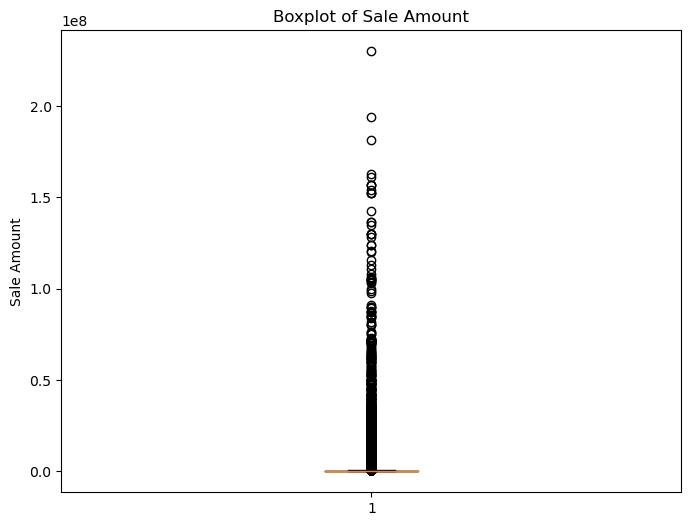

In [24]:
# Create a boxplot for the 'Sale Amount' column
plt.figure(figsize=(8, 6))
plt.title('Boxplot of Sale Amount')
plt.boxplot(df_re['Sale Amount'])
plt.ylabel('Sale Amount')
plt.show()

In [25]:
plt.savefig(os.path.join(path,'Analytics', 'Boxplot_SaleAmount.png'))

<Figure size 640x480 with 0 Axes>

### 02-7 Conducting tests for non normal distribution

In [26]:
### Extracting the 'Sale amount' column as a numpy array
sale_amount = df_re['Sale Amount'].values


### Defining the hypothetical median for the tests (e.g., 225000 based on the 50th percentile)
hypothetical_median = 225000

### Sign Test
### Counting the number of positive and negative differences
positive_diff = sum(df_re['Sale Amount'] > hypothetical_median)
negative_diff = sum(df_re['Sale Amount'] < hypothetical_median)


### Performing the sign test
sign_test_result = stats.binomtest(min(positive_diff, negative_diff), positive_diff + negative_diff)
print("Sign Test:")
print(f"Test Result: {sign_test_result}")


### Wilcoxon Signed-Rank Test
wilcoxon_stat, wilcoxon_p_value = stats.wilcoxon(df_re['Sale Amount'] - hypothetical_median)


print("\nWilcoxon Signed-Rank Test:")
print(f"Test Statistic: {wilcoxon_stat}")
print(f"P-Value: {wilcoxon_p_value}")


Sign Test:
Test Result: BinomTestResult(k=491665, n=987947, alternative='two-sided', statistic=0.49766333619111147, pvalue=3.4159452041092726e-06)

Wilcoxon Signed-Rank Test:
Test Statistic: 205836116759.5
P-Value: 0.0


Interpretation: The results of the statistical tests are as follows:

Sign Test:
Test Result: 3.4159452041092726e-06
Interpretation: The p-value obtained from the Sign Test is very small, indicating strong evidence against the null hypothesis. This suggests that there is a significant difference between the observations above and below the hypothetical median.

Wilcoxon Signed-Rank Test:
Test Statistic:205836116759.5 
P-Value: 0.0
Interpretation: The extremely large test statistic and the very small p-value from the Wilcoxon Signed-Rank Test indicate strong evidence against the null hypothesis. This suggests that there is a significant difference between the 'Sale Amount' values and the hypothetical median.

In both cases, the small p-values indicate that we can reject the null hypothesis in favor of the alternative hypothesis, providing evidence of a significant difference between the 'Sale Amount' values and the hypothetical median.  

Conclusion:Both tests confirm the distribution is not normal but left-skewd

### 02-8 Saving df of sold RE (Sale Amount >0)

In [27]:
df_re.to_csv(os.path.join(path,'Data','Prepared Data','realestate_sold.csv'))